In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
def display_scores(scores):
    tr_f1_avg = round(scores['train_f1_micro'].mean(), 4) * 100
    te_f1_avg = round(scores['test_f1_micro'].mean(), 4) * 100

    tr_acc_avg = round(scores['train_accuracy'].mean(), 4) * 100
    te_acc_avg = round(scores['test_accuracy'].mean(), 4) * 100

    print(f"Test Accuracy : {scores['test_accuracy']}")
    print(f"Train Accuracy : {scores['train_accuracy']}")

    print(f"Test F1 : {scores['test_f1_micro']}")
    print(f"Train F1 : {scores['train_f1_micro']}")


    print(f"Accuracy gap {(scores['train_accuracy'] - scores['test_accuracy'])}")
    print(f"F1 gap {(scores['train_f1_micro'] - scores['test_f1_micro'])}")

    plt.plot(scores["test_accuracy"], marker="x", label="Test")
    for idx, pt in enumerate(scores["test_accuracy"]):
        plt.annotate(round(pt, 3), (idx, pt))

    plt.plot(scores["train_accuracy"], marker="x", label="Train")
    for idx, pt in enumerate(scores["train_accuracy"]):
        plt.annotate(round(pt, 3), (idx, pt))

    plt.title(f"Accuracy avg test: {te_acc_avg} avg train: {tr_acc_avg}")
    plt.legend()
    plt.show()

    plt.plot(scores["test_f1_micro"], marker="x", label="Test")
    for idx, pt in enumerate(scores["test_f1_micro"]):
        plt.annotate(round(pt, 3), (idx, pt))

    plt.plot(scores["train_f1_micro"], marker="x", label="Train")
    for idx, pt in enumerate(scores["train_f1_micro"]):
        plt.annotate(round(pt, 3), (idx, pt))

    plt.title(f"F1, avg test: {te_f1_avg} avg train: {tr_f1_avg}")
    plt.legend()
    plt.show()


In [5]:
data = pd.read_csv('extracted_features.csv')

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing import StandardScaler

features = data.drop('y', axis=1)
labels = data['y']

X_train, X_test, y_train, y_test = train_test_split(features, labels, stratify=labels)

scaler = StandardScaler()
scaler.fit(X_train)

splitter = StratifiedKFold(n_splits=5)

print(X_train.shape)
print(X_test.shape)

(315, 49)
(105, 49)


Test Accuracy : [0.92063492 0.92063492 0.95238095 0.93650794 0.95238095]
Train Accuracy : [0.9484127  0.94444444 0.94047619 0.9484127  0.95238095]
Test F1 : [0.92063492 0.92063492 0.95238095 0.93650794 0.95238095]
Train F1 : [0.9484127  0.94444444 0.94047619 0.9484127  0.95238095]
Accuracy gap [ 0.02777778  0.02380952 -0.01190476  0.01190476  0.        ]
F1 gap [ 0.02777778  0.02380952 -0.01190476  0.01190476  0.        ]


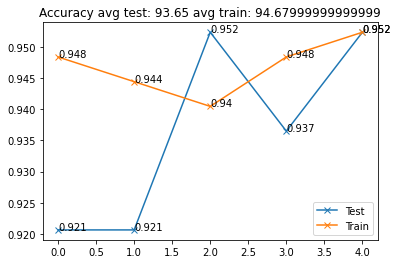

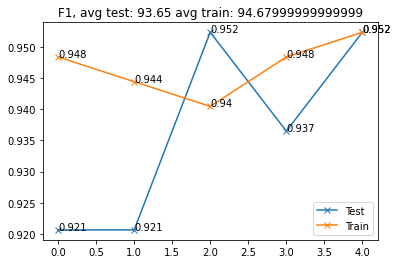

In [11]:
# Testing SVC
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

reg = 50
sigma = 1

k = "poly"
deg = 1
coef = 0

svm = SVC(
    class_weight='balanced',
    decision_function_shape='ovo',
    degree=deg,
    gamma=(1 / (sigma * sigma)),
    coef0=coef,
    C=(1 / reg),
    kernel=k,
)

bagged_svm = BaggingClassifier(base_estimator=svm, n_estimators=100, oob_score=True,max_features=0.8)

svm_scores = cross_validate(
    svm,
    scaler.transform(X_train),
    y_train,
    scoring=["accuracy", "f1_micro"],
    return_train_score=True,
    cv=splitter,
    n_jobs=-1,
)

display_scores(svm_scores)

Test Accuracy : [0.92063492 0.95238095 0.95238095 0.93650794 0.95238095]
Train Accuracy : [1. 1. 1. 1. 1.]
Test F1 : [0.92063492 0.95238095 0.95238095 0.93650794 0.95238095]
Train F1 : [1. 1. 1. 1. 1.]
Accuracy gap [0.07936508 0.04761905 0.04761905 0.06349206 0.04761905]
F1 gap [0.07936508 0.04761905 0.04761905 0.06349206 0.04761905]


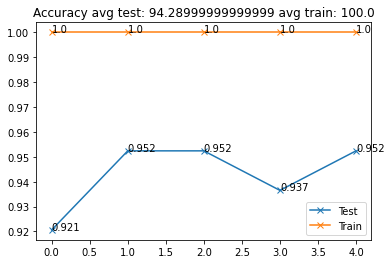

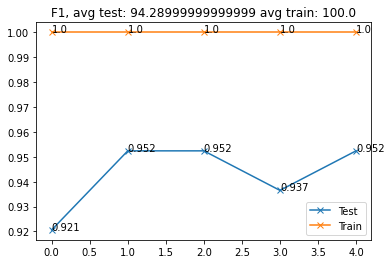

In [12]:
# Testing Random Forest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
    n_estimators=100,
    bootstrap=True,
    oob_score=True,
    criterion="gini",
    #class_weight="balanced",
    n_jobs=-1,
)

forest_scores = cross_validate(
    forest,
    X_train,
    y_train,
    scoring=["accuracy", "f1_micro"],
    return_train_score=True,
    cv=splitter,
    n_jobs=-1,
)

display_scores(forest_scores)


Test Accuracy : [0.77777778 0.79365079 0.6984127  0.87301587 0.84126984]
Train Accuracy : [0.81349206 0.78571429 0.71031746 0.90079365 0.9047619 ]
Test F1 : [0.77777778 0.79365079 0.6984127  0.87301587 0.84126984]
Train F1 : [0.81349206 0.78571429 0.71031746 0.90079365 0.9047619 ]
Accuracy gap [ 0.03571429 -0.00793651  0.01190476  0.02777778  0.06349206]
F1 gap [ 0.03571429 -0.00793651  0.01190476  0.02777778  0.06349206]


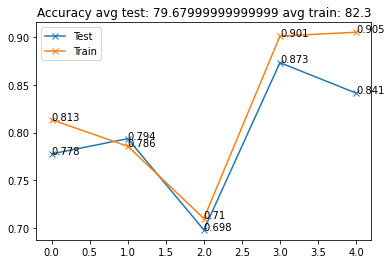

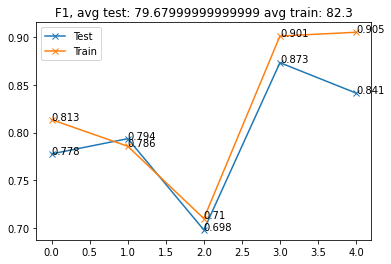

In [13]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(
    early_stopping=True,
    activation='relu', 
    solver='adam', 
    alpha=0.001, 
    beta_1=0.9,
    beta_2=0.999,
    hidden_layer_sizes=(90,), 
    learning_rate='adaptive',
    max_iter=1000,
    random_state=69,
)

nn_scores = cross_validate(
    nn,
    scaler.transform(X_train),
    y_train,
    scoring=["accuracy", "f1_micro"],
    return_train_score=True,
    cv=splitter,
    n_jobs=-1,
)

display_scores(nn_scores)

Scores on validation
SVM  0.9238095238095239
MLPClassifier  0.8761904761904762
RF  0.9238095238095239


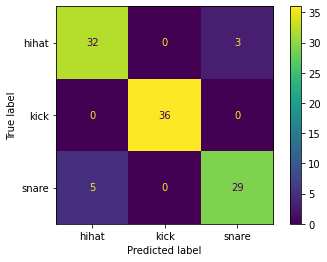

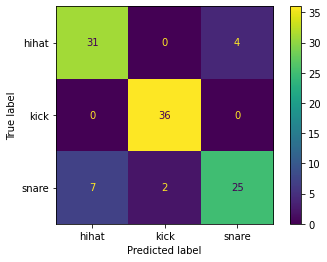

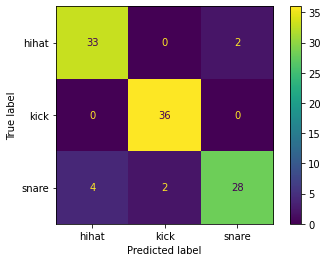

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Testing on validation set
svm.fit(scaler.transform(X_train), y_train)
nn.fit(scaler.transform(X_train), y_train)
forest.fit(X_train, y_train)

print('Scores on validation')
svm_pred = svm.predict(scaler.transform(X_test))
nn_pred = nn.predict(scaler.transform(X_test))
forest_pred = forest.predict(X_test)

print('SVM ', accuracy_score(y_test, svm_pred))
print('MLPClassifier ', accuracy_score(y_test, nn_pred))
print('RF ', accuracy_score(y_test, forest_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test, svm_pred), display_labels=labels.unique()).plot()
ConfusionMatrixDisplay(confusion_matrix(y_test, nn_pred), display_labels=labels.unique()).plot()
ConfusionMatrixDisplay(confusion_matrix(y_test, forest_pred), display_labels=labels.unique()).plot()

In [18]:
svm.fit(scaler.transform(features), labels)
nn.fit(scaler.transform(features), labels)
forest.fit(features, labels)

print('Scores after training on entire dataset')
print(svm.score(X=scaler.transform(features), y=labels))
print(nn.score(X=scaler.transform(features), y=labels))
print(forest.score(X=features, y=labels))

Scores after training on entire dataset
0.9523809523809523
0.8476190476190476
1.0


In [120]:
# Export

import pickle

with open('../src/model.pickle', 'wb') as handle:
    pickle.dump(svm, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('../src/scaler.pickle', 'wb') as handle:
    pickle.dump(scaler, handle, protocol=pickle.HIGHEST_PROTOCOL)